# Machine Learning Capstone Project
##### Manish Kumar, 15th October, 2019

### TMDB box office prediction

## 1. Data Exploration

In [13]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [14]:
# Importing csv file
tmdb=pd.read_csv("train.csv")

In [15]:
tmdb.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [16]:
# Checking size of the dataset
tmdb.shape

(3000, 23)

In [17]:
# Checking for duplicate values
sum(tmdb.duplicated())

0

In [18]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [19]:
tmdb.drop(['belongs_to_collection','tagline','id','homepage','poster_path','overview','Keywords'],axis=1,inplace=True)

In [20]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
budget                  3000 non-null int64
genres                  2993 non-null object
imdb_id                 3000 non-null object
original_language       3000 non-null object
original_title          3000 non-null object
popularity              3000 non-null float64
production_companies    2844 non-null object
production_countries    2945 non-null object
release_date            3000 non-null object
runtime                 2998 non-null float64
spoken_languages        2980 non-null object
status                  3000 non-null object
title                   3000 non-null object
cast                    2987 non-null object
crew                    2984 non-null object
revenue                 3000 non-null int64
dtypes: float64(2), int64(2), object(12)
memory usage: 375.1+ KB


In [21]:
tmdb.head()

,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [22]:
tmdb.genres

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
5       [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
6       [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
7                     [{'id': 99, 'name': 'Documentary'}]
8       [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
9       [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
10                          [{'id': 18, 'name': 'Drama'}]
11                         [{'id': 35, 'name': 'Comedy'}]
12                          [{'id': 18, 'name': 'Drama'}]
13      [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...
14      [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
15      [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
16      [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
17      [{'id'

In [23]:
#tmdb['genre1']=[d.get('name')  for d in tmdb.genres ]

In [24]:
tmdb['genres'].head(5)[1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [25]:
tmdb.columns

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'cast', 'crew', 'revenue'],
      dtype='object')

In [26]:
tmdb['cast'][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

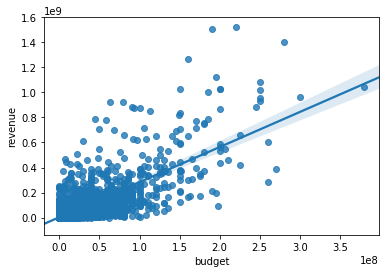

In [27]:
sb.regplot(tmdb['budget'],tmdb['revenue'])

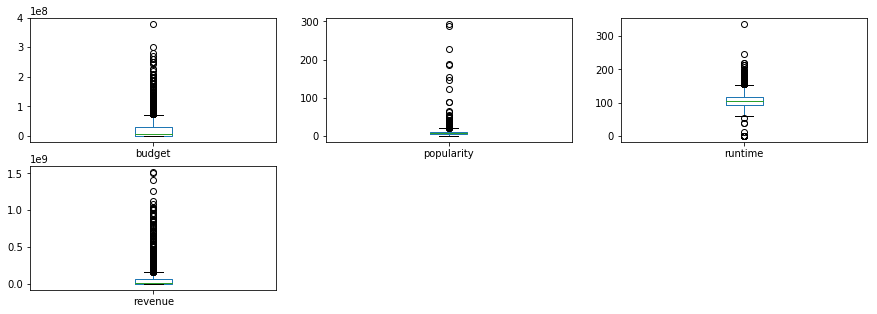

In [28]:
m=len(tmdb.select_dtypes(exclude='object').columns)
# print(m,m//3)
plt.figure(figsize=(15,5))
for i,col in enumerate(tmdb.select_dtypes(exclude='object').columns):
    plt.subplot((m//3)+1,3,i+1)
    tmdb[col].plot(kind='box')

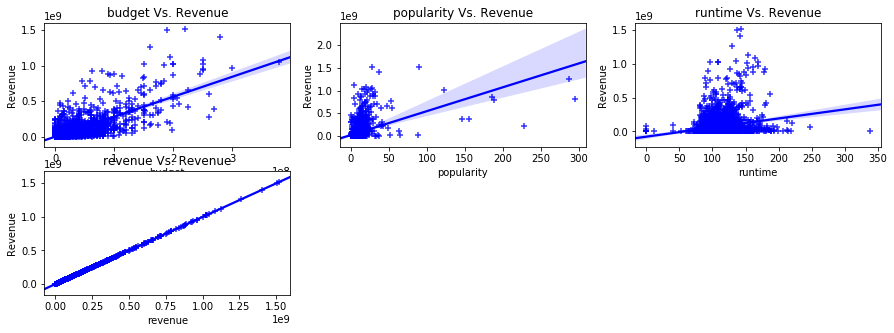

In [29]:
m=len(tmdb.select_dtypes(exclude='object').columns)
# print(m,m//3)
plt.figure(figsize=(15,5))
for i,col in enumerate(tmdb.select_dtypes(exclude='object').columns):
    plt.subplot((m//3)+1,3,i+1)
    sb.regplot(tmdb[col], tmdb.revenue, marker='+',color='b')
    plt.title('%s Vs. Revenue' % col)
    plt.xlabel(col)
    plt.ylabel('Revenue')      

In [30]:
tmdb.select_dtypes(exclude='object').columns

Index(['budget', 'popularity', 'runtime', 'revenue'], dtype='object')

In [31]:
tmdb.select_dtypes(include='object').columns

Index(['genres', 'imdb_id', 'original_language', 'original_title',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'title', 'cast', 'crew'],
      dtype='object')

In [32]:
tmdb.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


## 2. Data Preprocessing

## 3. Initial Model Implementation

## 4. Model Evaluation

## 5. Model Tuning

## 6. Final Model Evaluation